### Objectives 

### Business Understanding

### Data Understanding
#### Data Source
#### Features
#### Target

In [ ]:
#pip install lightgbm

In [ ]:
#pip install catboost

In [48]:
pip install stopwordsiso

In [49]:
# Python
import stopwordsiso as stopwords
stopwords.stopwords("sw")  # swahili stopwords


{'akasema',
 'alikuwa',
 'alisema',
 'baada',
 'basi',
 'bila',
 'cha',
 'chini',
 'hadi',
 'hapo',
 'hata',
 'hivyo',
 'hiyo',
 'huku',
 'huo',
 'ili',
 'ilikuwa',
 'juu',
 'kama',
 'karibu',
 'katika',
 'kila',
 'kima',
 'kisha',
 'kubwa',
 'kutoka',
 'kuwa',
 'kwa',
 'kwamba',
 'kwenda',
 'kwenye',
 'la',
 'lakini',
 'mara',
 'mdogo',
 'mimi',
 'mkubwa',
 'mmoja',
 'moja',
 'muda',
 'mwenye',
 'na',
 'naye',
 'ndani',
 'ng',
 'ni',
 'nini',
 'nonkungu',
 'pamoja',
 'pia',
 'sana',
 'sasa',
 'sauti',
 'tafadhali',
 'tena',
 'tu',
 'vile',
 'wa',
 'wakati',
 'wake',
 'walikuwa',
 'wao',
 'watu',
 'wengine',
 'wote',
 'ya',
 'yake',
 'yangu',
 'yao',
 'yeye',
 'yule',
 'za',
 'zaidi',
 'zake'}

In [1]:
# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical operations
import numpy as np

# Importing re for regular expression operations
import re 

# Importing matplotlib.pyplot for data visualization
import matplotlib.pyplot as plt

# Importing seaborn for statistical data visualization
import seaborn as sns

# Importing nltk for natural language processing tasks
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import string 


# Importing CountVectorizer for converting text data into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

# Importing train_test_split for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing various classification models for building predictive models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, RidgeClassifier, Lasso, ElasticNet, Ridge, BayesianRidge
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

# Importing log_loss and accuracy_score for model evaluation
from sklearn.metrics import accuracy_score, log_loss

# Importing TfidfVectorizer for converting text data into a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

# Importing hstack for horizontal stacking of sparse matrices
from scipy.sparse import hstack

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Importing joblib for saving and loading models
import joblib


### 1. Load Data


In [2]:
#load the data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sub = pd.read_csv('SampleSubmission.csv')

In [3]:
# Check the first five rows of train data
print("First five rows of train data:")
print(train.head())

# Check the first five rows of test data
print("\nFirst five rows of test data:")
print(test.head())



First five rows of train data:
       id                                            content  category
0     SW0   SERIKALI imesema haitakuwa tayari kuona amani...   Kitaifa
1     SW1   Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...  Biashara
2    SW10   SERIKALI imetoa miezi sita kwa taasisi zote z...   Kitaifa
3   SW100   KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...   michezo
4  SW1000   WATANZANIA wamekumbushwa kusherehekea sikukuu...   Kitaifa

First five rows of test data:
                                 swahili_id  \
0  001dd47ac202d9db6624a5ff734a5e7dddafeaf2   
1  0043d97f7690e9bc02f0ed8bb2b260d1d44bad92   
2  00579c2307b5c11003d21c40c3ecff5e922c3fd8   
3  00868eeee349e286303706ef0ffd851f39708d37   
4  00a5cb12d3058dcf2e42f277eee599992db32412   

                                             content  
0   MKUU wa Wilaya ya Bahi, Mkoani Dodoma, Mwanah...  
1   MWISHONI mwa wiki hii, Timu ya Soka ya Taifa,...  
2   THAMANI ya mauzo ya bidhaa za Afrika Masharik...  
3   MENEJ

In [4]:
# Check the shape of train data
print("Train Data Shape:", train.shape)

# Check the shape of test data
print("Test Data Shape:", test.shape)



Train Data Shape: (5151, 3)
Test Data Shape: (1288, 2)


In [5]:
# Check the information of train data
print("Train Data Information:")
print(train.info())

# Check the information of test data
print("\nTest Data Information:")
print(test.info())


Train Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151 entries, 0 to 5150
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5151 non-null   object
 1   content   5151 non-null   object
 2   category  5151 non-null   object
dtypes: object(3)
memory usage: 120.9+ KB
None

Test Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   swahili_id  1288 non-null   object
 1   content     1288 non-null   object
dtypes: object(2)
memory usage: 20.2+ KB
None


In [6]:
# Check the columns of train data
print("Train Data Columns:")
print(train.columns)

# Check the columns of test data
print("\nTest Data Columns:")
print(test.columns)


Train Data Columns:
Index(['id', 'content', 'category'], dtype='object')

Test Data Columns:
Index(['swahili_id', 'content'], dtype='object')


From the above lines of codes we have  rows 5151 and 3 columns on train dataset and 1288 rows, 2 columns in test dataset. The tree columns in train dataset are; Id, Content and category and in test dataset we have swahili_id and content columns. Also our test data is approximately 20%  of the train and test compined. On both dataset we have no missing values. 

#### Distribution Of Target 


We start by investing the content in the category column which is our target column

In [7]:
# Print statement to display the unique values in the "category" column
train.target_names = train["category"].unique()
print("Values in 'category' column:", train.target_names)


Values in 'category' column: ['Kitaifa' 'Biashara' 'michezo' 'Kimataifa' 'Burudani']


We know that there are five categories represented. How many are there of each?

In [8]:
import pandas as pd

# Count the occurrences of each category
category_counts = train["category"].value_counts()

# Create a DataFrame to hold the counts and target names
train_target_counts = pd.DataFrame(category_counts)
train_target_counts["target name"] = train_target_counts.index

# Rename the columns
train_target_counts.columns = ["count", "target name"]
train_target_counts.index.name = "target value"

# Display the modified DataFrame
print("Distribution of categories:")
print(train_target_counts)


Distribution of categories:
              count target name
target value                   
Kitaifa        2000     Kitaifa
michezo        1720     michezo
Biashara       1360    Biashara
Kimataifa        54   Kimataifa
Burudani         17    Burudani


In this case, the dataset seems to have a varying number of instances across different categories, with "Kitaifa", "michezo", and "Biashara" being the most represented categories, while "Kimataifa" and "Burudani" have fewer instances.. Now let's look at the features.

#### Visually Inspecting Features 

In [9]:
# Sample 3 records from the train dataset
sampled_records = train.sample(3)

# Display the full text and category label of each sampled record
for index, row in sampled_records.iterrows():
    print("Index:", index)
    print("Category:", row['category'])
    print("Full text:")
    print(row['content'])
    print("\n")  # Add a newline for readability


Index: 1320
Category: Kitaifa
Full text:
 TEKNOLOJIA ya maabara ya kupima afya ya udongo kwa gari maalumu lenye uwezo kupima sampuli 100 za udongo kwa siku imezinduliwa kupima udongo kumhakikishia mkulima uzalishaji mazao kwa wingi na yenye tija sokoni.Uzinduzi wa teknolojia hiyo kutoka Uholanzi ulifanywa Arusha na Naibu Waziri wa Mifugo na Uvuvi, Abdallah Ulega na Naibu Waziri wa Kilimo na Ubora wa Chakula wa Uholanzi, Marjolijn Sonnema kwa niaba ya nchi yake ili kufanikisha mageuzi katika sekta ya kilimo.Akizungumza baada ya kufanya uzinduzi wa teknolojia hiyo, Ulega aliishukuru Serikali ya Uholanzi kwa kutoa teknolojia yake nchini kwani italeta mapinduzi katika uzalishaji mazao.“Kupima afya ya udongo kunatoa majibu juu ya ubora wa ardhi, mazao yanayofaa kulimwa eneo hilo, kiwango cha mbolea kinachotakiwa na pia makadirio ya mavuno,” amesema Waziri Ulega.Amesema gharama ya kupima shamba ni Sh 25,000 hadi Sh 30,000 ambazo wakulima wanaweza kumudu na kuwataka wapime mashamba yao kabla 

in the above samples we haver loaded the three categories which are somehow balanced , kitaifa, Biashara and michezo. Now that we have an idea of the train dataset content we can move on to data cleaning and data exploratory analysis.

### 2.Perform Data Cleaning and Exploratory Data Analysis with nltk

One of the most basic problems seen when working with text data is things like punctuation, capitalization, stopwords and numbers. We perform text cleaning by removing the following; punctuation, capitalization, numbers and stopwords from our content column. 

In [10]:
X = train[['content']]  # Features
y = train['category']   # Target variable

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Standarizing Case , removing punctiation and numbers

In [11]:
import re
import string

def text_cleaning(text):
    '''Make text lowercase, remove text in square brackets, remove links, remove punctuation,
    and remove words containing numbers.'''
    # Convert text to lowercase
    text = text.lower()
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    # Remove links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation except for spaces
    text = re.sub(r'[^\w\s]', '', text)
    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    return text



In [12]:
# Apply text cleaning to the 'content' column of the X_train dataset
train['content_cleaned'] = train['content'].apply(text_cleaning)
X_train['content_cleaned'] = X_train['content'].apply(text_cleaning)
test['content_cleaned'] = test['content'].apply(text_cleaning)
sampled_records['content_cleaned'] = sampled_records['content'].apply(text_cleaning)
# Display the first few rows of the cleaned dataset
print(X_train.head())

                                                content  \
2024   WAKATI wachimbaji wakubwa, wa kati na wadogo ...   
3229   NIMEFIKA hospitali moja kubwa hapa jijini Dar...   
99     Mkurugenzi Mtendaji, wa mfuko huo, Stephen Em...   
2952   Tasnia ya habari imeaswa kuendana na mabadili...   
4580   WAZIRI wa Mambo ya Nje na Ushirikiano wa Afri...   

                                        content_cleaned  
2024   wakati wachimbaji wakubwa wa kati na wadogo w...  
3229   nimefika hospitali moja kubwa hapa jijini dar...  
99     mkurugenzi mtendaji wa mfuko huo stephen emma...  
2952   tasnia ya habari imeaswa kuendana na mabadili...  
4580   waziri wa mambo ya nje na ushirikiano wa afri...  


#### Tokenizing
Now that the case is consistent it's time to convert each document from a single long string into a set of tokens.

In [13]:
# Define the basic token pattern
basic_token_pattern = r"(?u)\b\w\w+\b"

# Tokenize the text using NLTK's word_tokenize function
def tokenize_text(text):
    """
    Tokenize the input text into words and punctuation tokens.
    
    Parameters:
    text (str): The input text.
    
    Returns:
    list: List of tokens.
    """
    return word_tokenize(text)

# Tokenize the 'content_cleaned' column in the X_train dataset
train['tokens'] = train['content_cleaned'].apply(tokenize_text)
sampled_records['tokens'] = sampled_records['content_cleaned'].apply(tokenize_text)
X_train['tokens'] = X_train['content_cleaned'].apply(tokenize_text)
test['tokens'] = test['content_cleaned'].apply(tokenize_text)
# Display the first few rows of the tokenized dataset
print(X_train.head())

                                                content  \
2024   WAKATI wachimbaji wakubwa, wa kati na wadogo ...   
3229   NIMEFIKA hospitali moja kubwa hapa jijini Dar...   
99     Mkurugenzi Mtendaji, wa mfuko huo, Stephen Em...   
2952   Tasnia ya habari imeaswa kuendana na mabadili...   
4580   WAZIRI wa Mambo ya Nje na Ushirikiano wa Afri...   

                                        content_cleaned  \
2024   wakati wachimbaji wakubwa wa kati na wadogo w...   
3229   nimefika hospitali moja kubwa hapa jijini dar...   
99     mkurugenzi mtendaji wa mfuko huo stephen emma...   
2952   tasnia ya habari imeaswa kuendana na mabadili...   
4580   waziri wa mambo ya nje na ushirikiano wa afri...   

                                                 tokens  
2024  [wakati, wachimbaji, wakubwa, wa, kati, na, wa...  
3229  [nimefika, hospitali, moja, kubwa, hapa, jijin...  
99    [mkurugenzi, mtendaji, wa, mfuko, huo, stephen...  
2952  [tasnia, ya, habari, imeaswa, kuendana, na, ma...  


Visualizing one of the row

In [14]:
example_tokens = X_train.iloc[250]["tokens"][:20]
example_tokens

['bendera',
 'alisema',
 'hayo',
 'juzi',
 'mjini',
 'hapa',
 'wakati',
 'akifungua',
 'semina',
 'kwa',
 'wajasiriamali',
 'wa',
 'mkoa',
 'wa',
 'morogoro',
 'juu',
 'ya',
 'kitengo',
 'cha',
 'kukuza']

Now that our data is clean we can perform EDA to understands words distribution

#### Exploratory Data Analysis: Frequency Distributions

 we use FreqDist from NLTK which allows us to pass in a single list of words, and it produces a dictionary-like output of those words and their frequencies. Then use Matplotlib to visualize the most common words of our content 

In [15]:
from nltk import FreqDist

example_freq_dist = FreqDist(X_train.iloc[600]["tokens"][:50])
example_freq_dist

FreqDist({'wa': 3, 'kampuni': 3, 'ya': 2, 'tanzania': 2, 'kwenye': 2, 'nchini': 2, 'cha': 2, 'na': 2, 'mkurugenzi': 1, 'tbl': 1, ...})

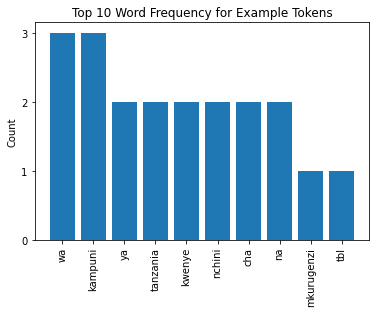

In [18]:
from nltk import FreqDist
from matplotlib.ticker import MaxNLocator

def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    
visualize_top_10(example_freq_dist, "Top 10 Word Frequency for Example Tokens")

In [19]:
X_train["tokens"].explode()

2024        wakati
2024    wachimbaji
2024       wakubwa
2024            wa
2024          kati
           ...    
860        alikuwa
860     akionekana
860             na
860       walemavu
860        amesema
Name: tokens, Length: 1180858, dtype: object

##### Top 10 Word Frequency for 3 Samples

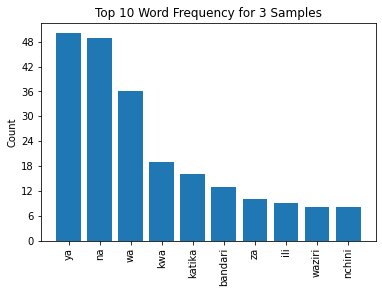

In [20]:
sample_freq_dist = FreqDist(sampled_records["tokens"].explode())
visualize_top_10(sample_freq_dist, "Top 10 Word Frequency for 3 Samples")

##### Top 10 word frequency for train dataset

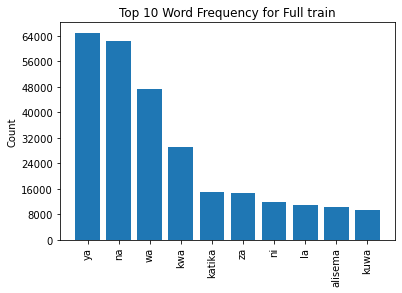

In [21]:

# Create a frequency distribution for X_train
X_train_freq_dist = FreqDist(X_train["tokens"].explode())

# Plot the top 10 tokens
visualize_top_10(X_train_freq_dist, "Top 10 Word Frequency for Full train")

word frequencies in our dataset 'ya'has highest frequency.
We can also subdivide this by category, to see if it makes a difference:

##### Category Text Distribution


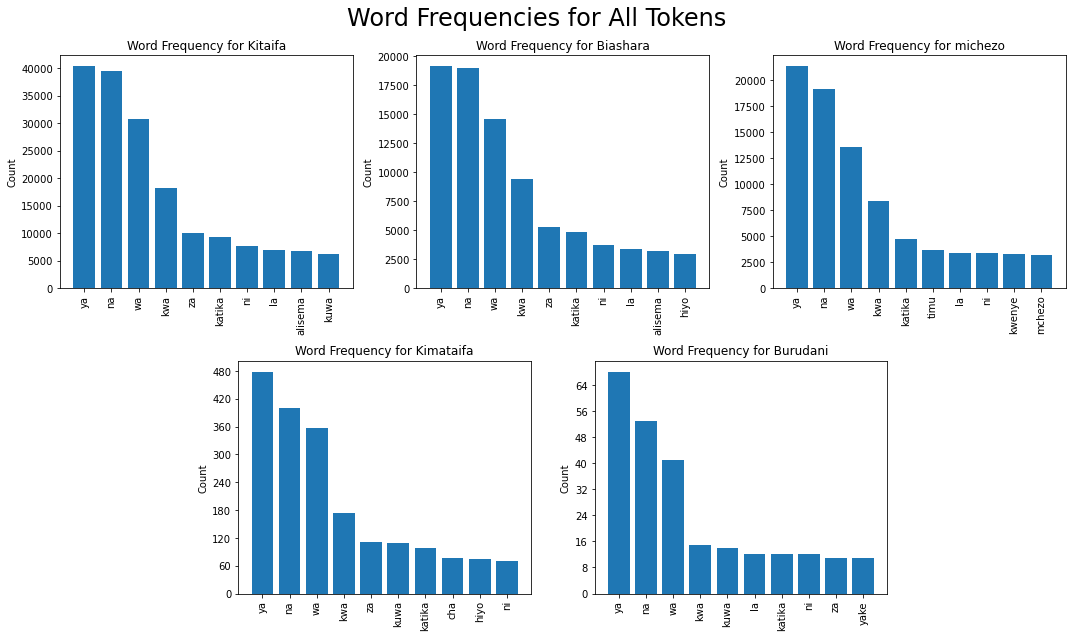

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import Counter

def setup_five_subplots():
    """
    It's hard to make an odd number of graphs pretty with just nrows
    and ncols, so we make a custom grid. See example for more details:
    https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_multicolumn.html

    We want the graphs to look like this:
     [ ] [ ] [ ]
       [ ] [ ]

    So we make a 2x6 grid with 5 graphs arranged on it. 3 in the
    top row, 2 in the second row

      0 1 2 3 4 5
    0|[|]|[|]|[|]|
    1| |[|]|[|]| |
    """
    fig = plt.figure(figsize=(15, 9))
    fig.set_tight_layout(True)
    gs = fig.add_gridspec(2, 6)
    ax1 = fig.add_subplot(gs[0, :2])  # row 0, cols 0-1
    ax2 = fig.add_subplot(gs[0, 2:4])  # row 0, cols 2-3
    ax3 = fig.add_subplot(gs[0, 4:])  # row 0, cols 4-5
    ax4 = fig.add_subplot(gs[1, 1:3])  # row 1, cols 1-2
    ax5 = fig.add_subplot(gs[1, 3:5])  # row 1, cols 3-4
    return fig, [ax1, ax2, ax3, ax4, ax5]

def plot_distribution_of_column_by_category(column, axes, title="Word Frequency for"):
    for index, category in enumerate(train.target_names):
        # Filter the dataset for the current category
        category_data = train[train["category"] == category][column]
        
        # Count the occurrences of words in this category
        word_counts = Counter(category_data.explode())
        
        if len(word_counts) > 0:  # Check if there are words to plot
            # Get the top 10 most common words and their counts
            top_10 = word_counts.most_common(10)
            tokens, counts = zip(*top_10)

            # Set up plot
            ax = axes[index]
            ax.bar(tokens, counts)

            # Customize plot appearance
            ax.set_title(f"{title} {category}")
            ax.set_ylabel("Count")
            ax.yaxis.set_major_locator(MaxNLocator(integer=True))
            ax.tick_params(axis="x", rotation=90)
        else:
            # If there are no words in this category, skip plotting
            print(f"No words found for category: {category}")

# Call the function to set up subplots
fig, axes = setup_five_subplots()

# Now you can populate each subplot with your category text distributions
plot_distribution_of_column_by_category("tokens", axes)

# Add a title to the whole figure
fig.suptitle("Word Frequencies for All Tokens", fontsize=24)

# Show the plot
plt.show()


### 3. Build and Evaluate a Baseline Model with TfidfVectorizer and MultinomialNB

We model by constructing a model that essentially only has access to the information depicted in the plots above. Therefore, we utilize the default token pattern to split the full text into tokens and employ a limited vocabulary. To provide the model with slightly more information using the same features, we employ a TfidfVectorizer. This vectorizer not only counts the term frequency (tf) within a single document but also incorporates the inverse document frequency (idf) — indicating how rare the term is.

We import the vectorizer, instantiate a vectorizer object, and fit it on train['content'].

In [23]:
# checking X_train Columns 
X_train.head()

,content,content_cleaned,tokens
2024,"WAKATI wachimbaji wakubwa, wa kati na wadogo ...",wakati wachimbaji wakubwa wa kati na wadogo w...,"[wakati, wachimbaji, wakubwa, wa, kati, na, wa..."
3229,NIMEFIKA hospitali moja kubwa hapa jijini Dar...,nimefika hospitali moja kubwa hapa jijini dar...,"[nimefika, hospitali, moja, kubwa, hapa, jijin..."
99,"Mkurugenzi Mtendaji, wa mfuko huo, Stephen Em...",mkurugenzi mtendaji wa mfuko huo stephen emma...,"[mkurugenzi, mtendaji, wa, mfuko, huo, stephen..."
2952,Tasnia ya habari imeaswa kuendana na mabadili...,tasnia ya habari imeaswa kuendana na mabadili...,"[tasnia, ya, habari, imeaswa, kuendana, na, ma..."
4580,WAZIRI wa Mambo ya Nje na Ushirikiano wa Afri...,waziri wa mambo ya nje na ushirikiano wa afri...,"[waziri, wa, mambo, ya, nje, na, ushirikiano, ..."


In [24]:
# Check the shape of X_train data
print("Train Data Shape:", X_train.shape)

# Check the shape of y_train data
print("Test Data Shape:", y_train.shape)

Train Data Shape: (4120, 3)
Test Data Shape: (4120,)


In [25]:
# Import the relevant vectorizer class
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate a vectorizer with max_features=10
# (we are using the default token pattern)
tfidf = TfidfVectorizer(max_features=10)

# Fit the vectorizer on X_train["content"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train["content"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names_out())

,alisema,hiyo,katika,kwa,la,na,ni,wa,ya,za
0,0.250409,0.081923,0.097709,0.335613,0.079738,0.352984,0.051079,0.485706,0.662005,0.025996
1,0.000000,0.268900,0.037005,0.254214,0.080532,0.568166,0.348216,0.150506,0.568303,0.255980
2,0.164773,0.080860,0.144661,0.265006,0.078703,0.522604,0.075624,0.261492,0.653413,0.307900
3,0.000000,0.000000,0.000000,0.104452,0.062042,0.566459,0.119230,0.360736,0.721123,0.000000
4,0.063906,0.125443,0.448844,0.154170,0.061049,0.354702,0.058661,0.557795,0.557525,0.000000
...,...,...,...,...,...,...,...,...,...,...
4115,0.160203,0.104823,0.070325,0.193242,0.051014,0.698652,0.098036,0.550854,0.338823,0.049894
4116,0.069544,0.068255,0.091583,0.195733,0.033217,0.303282,0.095754,0.331094,0.854912,0.032488
4117,0.000000,0.104911,0.218970,0.114609,0.085094,0.508533,0.065412,0.466495,0.649950,0.133160
4118,0.268864,0.048867,0.087425,0.248239,0.180742,0.529018,0.146250,0.474092,0.505453,0.204685


Now that we have preprocessed data, we fit and evaluate a multinomial Naive Bayes classifier using cross_val_score.

In [26]:
# Import relevant class and function
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Instantiate a MultinomialNB classifier
baseline_model = MultinomialNB()

# Evaluate the classifier on X_train_vectorized and y_train
baseline_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
baseline_cv

array([0.39320388, 0.39441748, 0.39684466, 0.39563107, 0.39320388])

In [27]:
y_train.value_counts(normalize=True)

Kitaifa      0.392233
michezo      0.329126
Biashara     0.264078
Kimataifa    0.010922
Burudani     0.003641
Name: category, dtype: float64

The baseline performance of the Multinomial Naive Bayes classifier, evaluated using cross-validation, yields an average accuracy of approximately 39.4%. This indicates that the classifier's predictive ability is slightly better than random chance. However, it's essential to consider the class balance within the dataset, as it significantly influences the interpretation of the results. The class distribution reveals that the majority class, 'Kitaifa', comprises approximately 39.2% of the training data, while the other classes, such as 'michezo' and 'Biashara', are less represented, with proportions of around 32.9% and 26.4%, respectively. This imbalance could affect the classifier's performance, potentially leading to biased predictions favoring the majority class. Thus, while the baseline accuracy provides a starting point for model evaluation, it's crucial to employ additional performance metrics and techniques, such as class weighting or resampling methods, to address the class imbalance and improve the classifier's effectiveness.

### 4. Iteratively Perform and Evaluate Preprocessing and Feature Engineering Techniques

#### Removing Stopwords
In general, we assume that stopwords do not contain useful information, but that is not always the case. Let's empirically investigate the top word frequencies of each category to see whether removing stopwords helps us to distinguish between the categories.

Now that NLTK does not provide a built-in corpus for Swahili stopwords.we created our own list of Swahili stopwords and named it sw_stopwords from an external source  

In [30]:
sw_stopwords=["akasema","alikuwa","alisema","baada","basi","bila","cha","chini","hadi",
              "hapo","hata","hivyo","hiyo","huku","huo","ili","ilikuwa","juu","kama","karibu",
              "katika","kila","kima","kisha","kubwa","kutoka","kuwa","kwa","kwamba","kwenda","kwenye","la","lakini",
              "mara","mdogo","mimi","mkubwa","mmoja","moja","muda","mwenye","na","naye","ndani","ng","ni","nini",
              "nonkungu","pamoja","pia","sana","sasa","sauti","tafadhali","tena","tu","vile","wa",
              "wakati","wake","walikuwa","wao","watu","wengine","wote","ya","yake","yangu","yao","yeye","yule","za",
              "zaidi","zake","na","ya","wa","kwa","ni","za","katika","la","kuwa","kama","kwamba","cha","hiyo","lakini","yake","hata","wakati",
              "hivyo","sasa","wake","au","watu","hii","zaidi","vya","huo","tu","kwenye","si","pia","ili","moja","kila","baada","ambao","ambayo","yao","wao","kuna",
              "hilo","kutoka","kubwa","pamoja","bila","huu","hayo","sana","ndani","mkuu","hizo","kufanya","wengi","hadi","mmoja","hili","juu","kwanza","wetu","kuhusu",
              "baadhi","wote","yetu","hivi","kweli","mara","wengine","nini","ndiyo","zao","kati","hao","hapa","kutokana","muda","habari","ambaye","wenye","nyingine","hakuna",
              "tena","hatua","bado","nafasi","basi","kabisa","hicho","nje","huyo","vile","yote","mkubwa","alikuwa","zote","leo","haya","huko","kutoa","mwa","kiasi","hasa","nyingi","kabla","wale","chini","gani","hapo","lazima","mwingine","bali","huku","zake","ilikuwa",
              "tofauti","kupata","mbalimbali","pale","kusema","badala","wazi","yeye","alisema","hawa",
              "ndio","hizi","tayari","wala","muhimu","ile","mpya","ambazo","dhidi","kwenda","sisi","kwani",
              "jinsi","binafsi","kutumia","mbili","mbali","kuu","mengine","mbele","namna","mengi","upande","na","lakini","ingawa"
              "ingawaje","kwa","sababu","hadi","hata","kama","ambapo","ambamo","ambako","ambacho","ambao","ambaye","ilhali","ya","yake","yao","yangu","yetu","yenu","vya","vyao","vyake","vyangu",
"vyenu","vyetu","yako","yao","hizo","yenu","mimi","sisi","wewe","nyinyi","yeye","wao","nao","nasi","nanyi","ni","alikuwa","atakuwa","hii","hizi","zile",
"ile","hivi","vile","za","zake","zao","zenu","kwenye","katika","kwa","kwao","kwenu","kwetu","dhidi","kati","miongoni","katikati","wakati","kabla","baada",
"baadaye","nje","tena","mbali","halafu","hapa","pale","mara","mara","yoyote","wowote","chochote","vyovyote","yeyote","lolote","mwenye","mwenyewe","lenyewe",
"lenye","wote","lote","vyote","nyote","kila","zaidi","hapana","ndiyo","au","ama","ama","sio","siye","tu","budi","nyingi","nyingine","wengine","mwingine",
"zingine","lingine","kingine","chote","sasa","basi","bila","cha","chini","hapo","pale","huku","kule","humu","hivyo","hivyohivyo","vivyo","palepale","fauka",
"hiyo","hiyohiyo","zile","zilezile","hao","haohao","huku","hukuhuku","humuhumu","huko","hukohuko","huo","huohuo","hili","hilihili","ilikuwa","juu","karibu",
"kila","kima","kisha","kutoka","kwenda","kubwa","ndogo","kwamba","kuwa","la","lao","lo","mara","na",
"mdogo","mkubwa","ng’o","pia","aidha","vile","vilevile","kadhalika","halikadhalika","ni","sana","pamoja","pamoja","tafadhali","tena",
"wa","wake","wao",
"ya","yule","wale","zangu","nje","afanaleki","salale","oyee","yupi","ipi","lipi","ngapi","yetu","si","angali","wangali","loo","la","ohoo",
"barabara","oyee",
"ewaa","walahi","masalale","duu","toba","mh","kumbe","ala","ebo","haraka","pole","polepole","harakaharaka","hiyo","hivyo","vyovyote",
"atakuwa","itakuwa","mtakuwa",
"tutakuwa","labda","yumkini","haiyumkini","yapata","takribani","hususani","yawezekana","nani","juu""chini",
"ndani","baadhi","kuliko","vile","mwa","kwa","hasha","hivyo","moja","kisha",
"pili","kwanza","ili","je","jinsi","ila","ila","nini","hasa","huu","zako","mimi",
]

In [31]:
def remove_stopwords(token_list):
    """
    Given a list of tokens, return a list where the tokens
    that are also present in stopwords_list have been
    removed
    """
    stopwords_removed = [token for token in token_list if token not in sw_stopwords]
    return stopwords_removed


In [32]:
tokens_example = X_train.iloc[100]["tokens"]
print("Length with stopwords:", len(tokens_example))


tokens_example_without_stopwords = remove_stopwords(tokens_example)
print("Length without stopwords:", len(tokens_example_without_stopwords))


Length with stopwords: 312
Length without stopwords: 193


In [33]:
X_train["text_without_stopwords"] = X_train["tokens"].apply(remove_stopwords)
X_train.head()

,content,content_cleaned,tokens,text_without_stopwords
2024,"WAKATI wachimbaji wakubwa, wa kati na wadogo ...",wakati wachimbaji wakubwa wa kati na wadogo w...,"[wakati, wachimbaji, wakubwa, wa, kati, na, wa...","[wachimbaji, wakubwa, wadogo, wakibadilishana,..."
3229,NIMEFIKA hospitali moja kubwa hapa jijini Dar...,nimefika hospitali moja kubwa hapa jijini dar...,"[nimefika, hospitali, moja, kubwa, hapa, jijin...","[nimefika, hospitali, jijini, dar, es, salaam,..."
99,"Mkurugenzi Mtendaji, wa mfuko huo, Stephen Em...",mkurugenzi mtendaji wa mfuko huo stephen emma...,"[mkurugenzi, mtendaji, wa, mfuko, huo, stephen...","[mkurugenzi, mtendaji, mfuko, stephen, emmanue..."
2952,Tasnia ya habari imeaswa kuendana na mabadili...,tasnia ya habari imeaswa kuendana na mabadili...,"[tasnia, ya, habari, imeaswa, kuendana, na, ma...","[tasnia, imeaswa, kuendana, mabadiliko, teknol..."
4580,WAZIRI wa Mambo ya Nje na Ushirikiano wa Afri...,waziri wa mambo ya nje na ushirikiano wa afri...,"[waziri, wa, mambo, ya, nje, na, ushirikiano, ...","[waziri, mambo, ushirikiano, afrika, mashariki..."


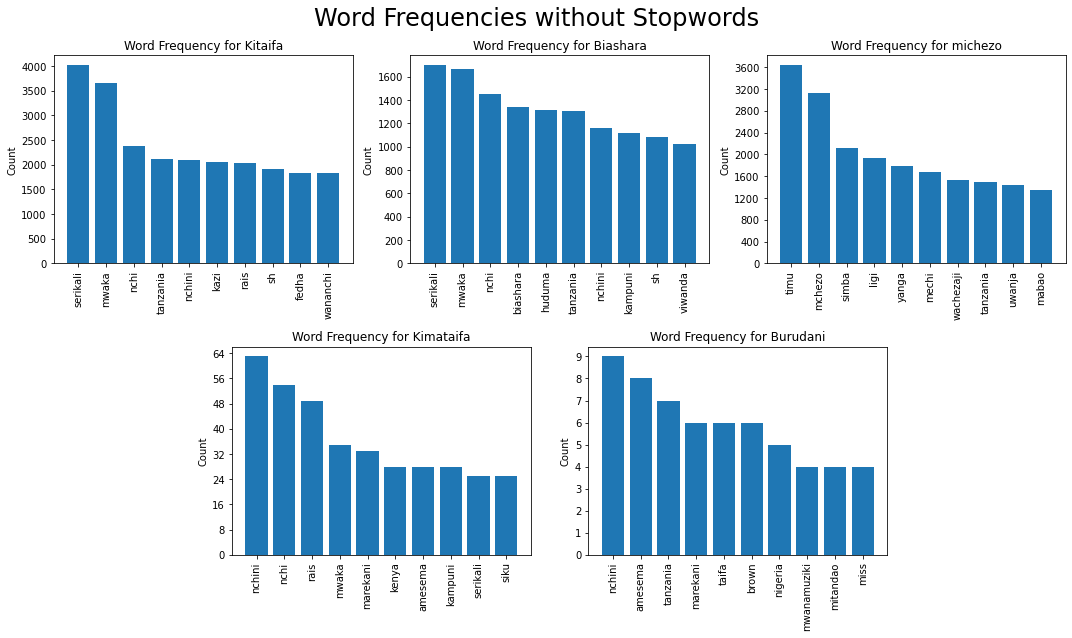

In [34]:
#apply stopwords to train dataset
train["text_without_stopwords"] = train["tokens"].apply(remove_stopwords)
fig, axes = setup_five_subplots()
plot_distribution_of_column_by_category("text_without_stopwords", axes)
fig.suptitle("Word Frequencies without Stopwords", fontsize=24);

The most common words differ significantly between categories now apart from serikali which appears in three categories, meaning that hopefully our model will have an easier time distinguishing between them.

we can check model performance after removing stopwrds, when instantiating the vectorizer:

In [36]:
# Instantiate the vectorizer
tfidf = TfidfVectorizer(
    max_features=10,
    stop_words = sw_stopwords
)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train["content"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names_out())

,fedha,kazi,mchezo,mwaka,nchi,nchini,serikali,sh,tanzania,timu
0,0.117273,0.000000,0.000000,0.330932,0.102255,0.000000,0.562398,0.741608,0.000000,0.000000
1,0.000000,0.454938,0.000000,0.359551,0.000000,0.000000,0.814711,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.622718,0.000000,0.492152,0.608283,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.338874,0.418837,0.759538,0.000000,0.000000,0.364474,0.000000
...,...,...,...,...,...,...,...,...,...,...
4115,0.000000,0.527552,0.000000,0.000000,0.515323,0.000000,0.629833,0.000000,0.149479,0.192605
4116,0.000000,0.000000,0.184186,0.000000,0.143244,0.129882,0.000000,0.000000,0.000000,0.963684
4117,0.000000,0.000000,0.000000,0.730111,0.000000,0.272740,0.000000,0.000000,0.436259,0.449698
4118,0.281397,0.313981,0.000000,0.347408,0.429384,0.166857,0.393598,0.222437,0.533789,0.000000


In [39]:
# Evaluate the classifier on X_train_vectorized and y_train
no_stopwords_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
no_stopwords_cv

array([0.64320388, 0.62378641, 0.63106796, 0.63228155, 0.6407767 ])

In [40]:
print("Baseline:         ", baseline_cv.mean())
print("Stopwords removed:", no_stopwords_cv.mean())

Baseline:          0.3946601941747573
Stopwords removed: 0.6342233009708739


#### Using Custom Tokens

In [4]:
from nltk.stem.snowball import SnowballStemmer

# Initialize the SnowballStemmer for Swahili language
stemmer = SnowballStemmer(language="english")

# Test the stemmer
print(stemmer.stem("majani"))  # Output: majan


majani


In [2]:
from nltk.stem.snowball import SnowballStemmer

# Initialize the SnowballStemmer for Swahili language
stemmer = SnowballStemmer(language="sw")

# Define a function to stem and tokenize a document
def stem_and_tokenize(document):
    # Tokenize the document
    tokens = tokenizer.tokenize(document)
    # Stem each token using the SnowballStemmer
    return [stemmer.stem(token) for token in tokens]




ValueError: The language 'sw' is not supported.

#### Domain-Specific Feature Engineering

##### Number of Sentences-Does the number of sentences in a post differ by category?

#### Increasing max_features

### 5. Evaluate a Final Model on the Test Set


### Interpreting Results